In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'statsmodels'

# train

In [2]:
df_train_og = pd.read_csv('open_ag/train/train.csv')
df_train_og.head()

,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원)
0,201801상순,건고추,화건,30 kg,상품,381666.666667,590000.0
1,201801중순,건고추,화건,30 kg,상품,380809.666667,590000.0
2,201801하순,건고추,화건,30 kg,상품,380000.000000,590000.0
3,201802상순,건고추,화건,30 kg,상품,380000.000000,590000.0
4,201802중순,건고추,화건,30 kg,상품,376666.666667,590000.0


In [3]:
df_train_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29376 entries, 0 to 29375
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시점          29376 non-null  object 
 1   품목명         29376 non-null  object 
 2   품종명         29376 non-null  object 
 3   거래단위        29376 non-null  object 
 4   등급          29376 non-null  object 
 5   평년 평균가격(원)  29376 non-null  float64
 6   평균가격(원)     29376 non-null  float64
dtypes: float64(2), object(5)
memory usage: 1.6+ MB


In [26]:
df_train_og['품목명'].unique()

array(['건고추', '사과', '감자', '배', '깐마늘(국산)', '무', '상추', '배추', '양파', '대파'],
      dtype=object)

In [27]:
df_train_og[df_train_og['품목명'] == '감자'] #4752

,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원)
1872,201801상순,감자,감자 수미,20키로상자,상,24660.031746,44170.285714
1873,201801중순,감자,감자 수미,20키로상자,상,23299.444444,48283.777778
1874,201801하순,감자,감자 수미,20키로상자,상,25218.007407,50243.000000
1875,201802상순,감자,감자 수미,20키로상자,상,28703.875000,55380.666667
1876,201802중순,감자,감자 수미,20키로상자,상,27419.882275,59133.000000
...,...,...,...,...,...,...,...
6619,202111중순,감자,홍감자,10키로상자,특,0.000000,0.000000
6620,202111하순,감자,홍감자,10키로상자,특,0.000000,0.000000
6621,202112상순,감자,홍감자,10키로상자,특,0.000000,0.000000
6622,202112중순,감자,홍감자,10키로상자,특,0.000000,0.000000


In [28]:
#감자 수미, 거래 단위, 등급
potato = df_train_og[(df_train_og['품목명'] == '감자')
                & (df_train_og['품종명'] == '감자 수미')
                & (df_train_og['거래단위'] =='20키로상자')
                & (df_train_og['등급'] == '상')]

In [29]:
potato.reset_index(drop = True, inplace=True)

In [30]:
potato

,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원)
0,201801상순,감자,감자 수미,20키로상자,상,24660.031746,44170.285714
1,201801중순,감자,감자 수미,20키로상자,상,23299.444444,48283.777778
2,201801하순,감자,감자 수미,20키로상자,상,25218.007407,50243.000000
3,201802상순,감자,감자 수미,20키로상자,상,28703.875000,55380.666667
4,201802중순,감자,감자 수미,20키로상자,상,27419.882275,59133.000000
...,...,...,...,...,...,...,...
139,202111중순,감자,감자 수미,20키로상자,상,30634.777778,33761.333333
140,202111하순,감자,감자 수미,20키로상자,상,32139.787037,36023.875000
141,202112상순,감자,감자 수미,20키로상자,상,31688.643519,35233.666667
142,202112중순,감자,감자 수미,20키로상자,상,33251.916667,32679.125000


In [31]:
potato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시점          144 non-null    object 
 1   품목명         144 non-null    object 
 2   품종명         144 non-null    object 
 3   거래단위        144 non-null    object 
 4   등급          144 non-null    object 
 5   평년 평균가격(원)  144 non-null    float64
 6   평균가격(원)     144 non-null    float64
dtypes: float64(2), object(5)
memory usage: 8.0+ KB


In [32]:
potato.describe()

,평년 평균가격(원),평균가격(원)
count,144.000000,144.000000
mean,29891.732365,36446.472495
std,7884.328709,16835.695830
min,17505.129630,16343.600000
25%,24348.660880,25148.395833
50%,28607.249074,32385.951389
75%,33669.710648,42796.211111
max,49818.066667,115127.750000


In [33]:
potato['시점'] = potato['시점'].str.replace('상순', '01').str.replace('중순', '11').str.replace('하순', '21')

/var/folders/ng/72pd8d0x4p333xn15g8m8rd40000gn/T/ipykernel_17299/2858285882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potato['시점'] = potato['시점'].str.replace('상순', '01').str.replace('중순', '11').str.replace('하순', '21')


In [34]:
potato['dt'] = pd.to_datetime(potato['시점'], format='%Y%m%d')

/var/folders/ng/72pd8d0x4p333xn15g8m8rd40000gn/T/ipykernel_17299/2068473891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potato['dt'] = pd.to_datetime(potato['시점'], format='%Y%m%d')


In [35]:
potato.head()

,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원),dt
0,20180101,감자,감자 수미,20키로상자,상,24660.031746,44170.285714,2018-01-01
1,20180111,감자,감자 수미,20키로상자,상,23299.444444,48283.777778,2018-01-11
2,20180121,감자,감자 수미,20키로상자,상,25218.007407,50243.000000,2018-01-21
3,20180201,감자,감자 수미,20키로상자,상,28703.875000,55380.666667,2018-02-01
4,20180211,감자,감자 수미,20키로상자,상,27419.882275,59133.000000,2018-02-11


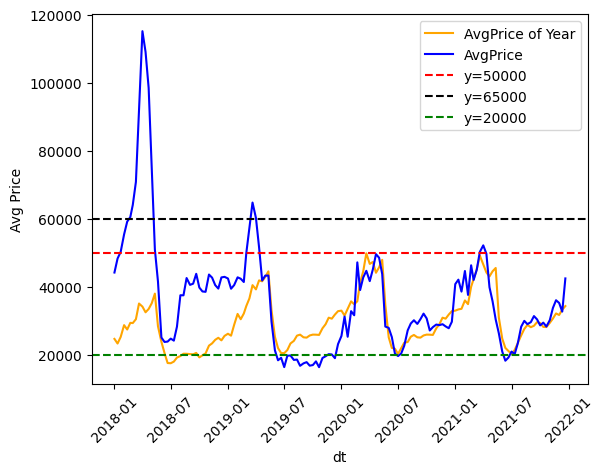

In [36]:
# 첫 번째 라인 그래프
plt.plot(potato['dt'], potato['평년 평균가격(원)'], color = 'orange', label='AvgPrice of Year')  # 첫 번째 y축 값
# 두 번째 라인 그래프
plt.plot(potato['dt'], potato['평균가격(원)'], color = 'blue', label='AvgPrice')  # 두 번째 y축


plt.axhline(y=50000, color='red', linestyle='--', label='y=50000') #50000원
plt.axhline(y=60000, color='black', linestyle='--', label='y=65000')
plt.axhline(y=20000, color='green', linestyle='--', label='y=20000')
plt.xlabel('dt')
plt.ylabel('Avg Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

/var/folders/ng/72pd8d0x4p333xn15g8m8rd40000gn/T/ipykernel_17299/3716262614.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potato['diff'] = potato['평균가격(원)'].diff()
/var/folders/ng/72pd8d0x4p333xn15g8m8rd40000gn/T/ipykernel_17299/3716262614.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potato['second_diff'] = potato['diff'].diff()


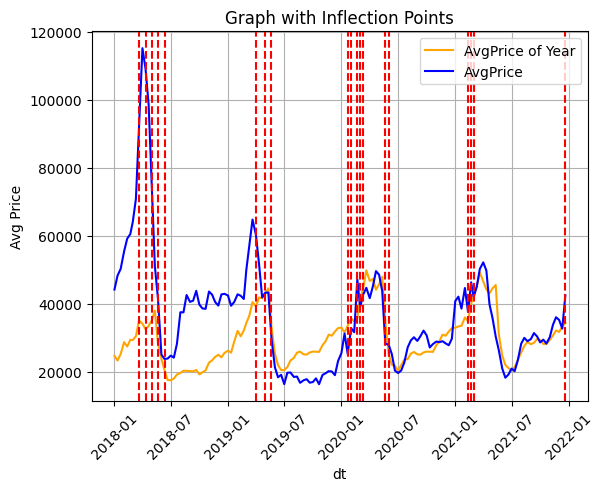

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임의 기울기 계산 (변화율)
potato['diff'] = potato['평균가격(원)'].diff()

# 기울기의 변화율 계산 (두 번째 차분)
potato['second_diff'] = potato['diff'].diff()

# 임계값 설정 (변곡점으로 간주할 기준)
threshold = potato['second_diff'].std() * 1.5  # 표준편차의 2배를 임계값으로 설정

# 변곡점 탐지
inflection_points = potato[np.abs(potato['second_diff']) > threshold]

# 첫 번째 라인 그래프
plt.plot(potato['dt'], potato['평년 평균가격(원)'], color = 'orange', label='AvgPrice of Year')
plt.plot(potato['dt'], potato['평균가격(원)'], color = 'blue', label='AvgPrice')

# 변곡점에 y축에 평행한 선 추가
for idx, row in inflection_points.iterrows():
    plt.axvline(x=row['dt'], color='red', linestyle='--')

# 그래프 세부 설정
plt.xlabel('dt')
plt.ylabel('Avg Price')
plt.title('Graph with Inflection Points')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

In [38]:
print("변곡점에 해당하는 x값 (날짜):")
for idx, row in inflection_points.iterrows():
    print(row['dt'])  # 변곡점에 해당하는 x값 (날짜) 출력

변곡점에 해당하는 x값 (날짜):
2018-03-21 00:00:00
2018-04-11 00:00:00
2018-05-01 00:00:00
2018-05-21 00:00:00
2018-06-11 00:00:00
2019-04-01 00:00:00
2019-05-01 00:00:00
2019-05-21 00:00:00
2020-01-21 00:00:00
2020-02-01 00:00:00
2020-02-21 00:00:00
2020-03-01 00:00:00
2020-03-11 00:00:00
2020-05-21 00:00:00
2020-06-01 00:00:00
2021-02-11 00:00:00
2021-02-21 00:00:00
2021-03-01 00:00:00
2021-12-21 00:00:00


In [39]:
potato

,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원),dt,diff,second_diff
0,20180101,감자,감자 수미,20키로상자,상,24660.031746,44170.285714,2018-01-01,NaN,NaN
1,20180111,감자,감자 수미,20키로상자,상,23299.444444,48283.777778,2018-01-11,4113.492063,NaN
2,20180121,감자,감자 수미,20키로상자,상,25218.007407,50243.000000,2018-01-21,1959.222222,-2154.269841
3,20180201,감자,감자 수미,20키로상자,상,28703.875000,55380.666667,2018-02-01,5137.666667,3178.444444
4,20180211,감자,감자 수미,20키로상자,상,27419.882275,59133.000000,2018-02-11,3752.333333,-1385.333333
...,...,...,...,...,...,...,...,...,...,...
139,20211111,감자,감자 수미,20키로상자,상,30634.777778,33761.333333,2021-11-11,3579.888889,1698.333333
140,20211121,감자,감자 수미,20키로상자,상,32139.787037,36023.875000,2021-11-21,2262.541667,-1317.347222
141,20211201,감자,감자 수미,20키로상자,상,31688.643519,35233.666667,2021-12-01,-790.208333,-3052.750000
142,20211211,감자,감자 수미,20키로상자,상,33251.916667,32679.125000,2021-12-11,-2554.541667,-1764.333333


/var/folders/ng/72pd8d0x4p333xn15g8m8rd40000gn/T/ipykernel_17299/83446407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potato['Month'] = potato['dt'].dt.month


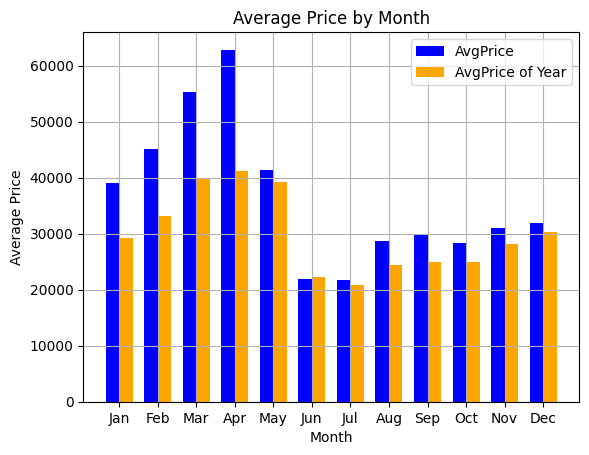

In [40]:
potato['Month'] = potato['dt'].dt.month

# 월별 평균 구하기
monthly_avg = potato.groupby('Month')['평균가격(원)'].mean()
monthly_year_avg = potato.groupby('Month')['평년 평균가격(원)'].mean()

# 막대의 너비 설정
bar_width = 0.35

# x축 인덱스 위치 설정
index = np.arange(1, 13)

# 그래프 그리기 (나란히 보이게 막대그래프)
plt.bar(index - bar_width/2, monthly_avg.values, bar_width, label='AvgPrice', color = 'blue')
plt.bar(index + bar_width/2, monthly_year_avg.values, bar_width, label='AvgPrice of Year', color = 'orange')

# x축을 1월, 2월, 3월...로 설정
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# 그래프 세부 설정
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price by Month')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

# test

In [41]:
df_test00_og = pd.read_csv('open_ag/test/TEST_00.csv')
df_test00_og.head()

,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원)
0,T-8순,건고추,화건,30 kg,상품,537302.666667,552000.0
1,T-7순,건고추,화건,30 kg,상품,534742.000000,555743.0
2,T-6순,건고추,화건,30 kg,상품,537408.666667,559794.0
3,T-5순,건고추,화건,30 kg,상품,592768.000000,578819.0
4,T-4순,건고추,화건,30 kg,상품,0.000000,579167.0


In [42]:
df_test00_og[df_test00_og['품목명'] == '감자']

,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원)
117,T-8순,감자,감자 수미,20키로상자,상,21555.504630,35205.666667
118,T-7순,감자,감자 수미,20키로상자,상,24622.122222,34771.000000
119,T-6순,감자,감자 수미,20키로상자,상,28942.482143,37765.777778
120,T-5순,감자,감자 수미,20키로상자,상,31310.370370,38959.777778
121,T-4순,감자,감자 수미,20키로상자,상,31883.859259,38485.444444
...,...,...,...,...,...,...,...
409,T-4순,감자,홍감자,10키로상자,특,0.000000,0.000000
410,T-3순,감자,홍감자,10키로상자,특,0.000000,0.000000
411,T-2순,감자,홍감자,10키로상자,특,0.000000,0.000000
412,T-1순,감자,홍감자,10키로상자,특,0.000000,0.000000


In [43]:
#감자 수미, 거래 단위, 등급
potato_test00 = df_test00_og[(df_test00_og['품목명'] == '감자')
                & (df_test00_og['품종명'] == '감자 수미')
                & (df_test00_og['거래단위'] =='20키로상자')
                & (df_test00_og['등급'] == '상')]

In [44]:
potato_test00

,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원)
117,T-8순,감자,감자 수미,20키로상자,상,21555.504630,35205.666667
118,T-7순,감자,감자 수미,20키로상자,상,24622.122222,34771.000000
119,T-6순,감자,감자 수미,20키로상자,상,28942.482143,37765.777778
120,T-5순,감자,감자 수미,20키로상자,상,31310.370370,38959.777778
121,T-4순,감자,감자 수미,20키로상자,상,31883.859259,38485.444444
122,T-3순,감자,감자 수미,20키로상자,상,30931.495370,40017.500000
123,T-2순,감자,감자 수미,20키로상자,상,31969.070767,39841.000000
124,T-1순,감자,감자 수미,20키로상자,상,32701.333333,36873.222222
125,T,감자,감자 수미,20키로상자,상,32193.702778,37901.375000


/Users/juran/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


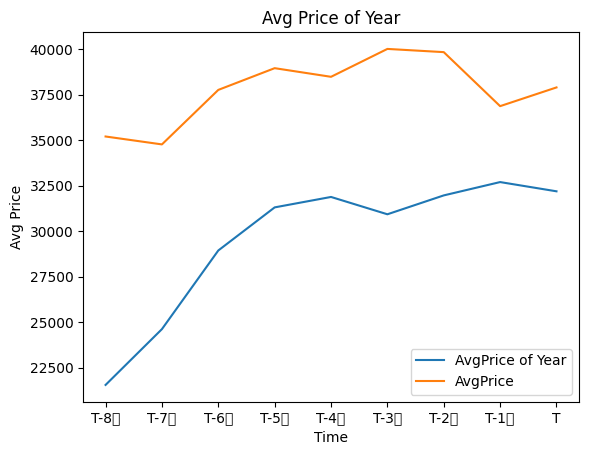

In [45]:
plt.plot(potato_test00['시점'], potato_test00['평년 평균가격(원)'], label='AvgPrice of Year')
plt.plot(potato_test00['시점'], potato_test00['평균가격(원)'], label='AvgPrice')
plt.xlabel('Time')
plt.ylabel('Avg Price')
plt.legend()
plt.title('Avg Price of Year')
plt.show()

In [46]:

from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# 데이터 준비
# 예시: potato 데이터에서 'dt'와 '평균가격(원)'을 사용
potato['dt'] = pd.to_datetime(potato['dt'])
potato.set_index('dt', inplace=True)

# 2017, 2018년 데이터를 학습에 사용
train_data = potato.loc['2017':'2018', '평균가격(원)']

# ARIMA 모델 학습
model = ARIMA(train_data, order=(p, d, q))  # p, d, q는 최적화할 하이퍼파라미터
model_fit = model.fit()

# 2019년 예측
forecast = model_fit.forecast(steps=12)  # 12개월(1년) 예측

print(forecast)

ModuleNotFoundError: No module named 'statsmodels'